In [13]:
import pandas as  pd
df=pd.read_csv("Tweets.csv")

In [14]:
df.head

<bound method NDFrame.head of                  tweet_id airline_sentiment  airline_sentiment_confidence   
0      570306133677760513           neutral                        1.0000  \
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason

In [15]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [16]:

dfn=df[['text','airline_sentiment']]
print(dfn.shape)

(14640, 2)


In [17]:
#remove stop words
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JeeKay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
#stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_text(text):
    tokens = nltk.word_tokenize(text)
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)


In [19]:
#removing url and special characters
import re

def remove_urls_special_characters(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters and punctuation except for apostrophes
    text = re.sub(r'[^a-zA-Z0-9\']+', ' ', text)
    return text


In [20]:
dfn.head

<bound method NDFrame.head of                                                     text airline_sentiment
0                    @VirginAmerica What @dhepburn said.           neutral
1      @VirginAmerica plus you've added commercials t...          positive
2      @VirginAmerica I didn't today... Must mean I n...           neutral
3      @VirginAmerica it's really aggressive to blast...          negative
4      @VirginAmerica and it's a really big bad thing...          negative
...                                                  ...               ...
14635  @AmericanAir thank you we got on a different f...          positive
14636  @AmericanAir leaving over 20 minutes Late Flig...          negative
14637  @AmericanAir Please bring American Airlines to...           neutral
14638  @AmericanAir you have my money, you change my ...          negative
14639  @AmericanAir we have 8 ppl so we need 2 know h...           neutral

[14640 rows x 2 columns]>

In [21]:
dfn=dfn[dfn['airline_sentiment']!='neutral']
print(dfn.shape)

(11541, 2)


In [22]:
dfn.head

<bound method NDFrame.head of                                                     text airline_sentiment
1      @VirginAmerica plus you've added commercials t...          positive
3      @VirginAmerica it's really aggressive to blast...          negative
4      @VirginAmerica and it's a really big bad thing...          negative
5      @VirginAmerica seriously would pay $30 a fligh...          negative
6      @VirginAmerica yes, nearly every time I fly VX...          positive
...                                                  ...               ...
14633  @AmericanAir my flight was Cancelled Flightled...          negative
14634         @AmericanAir right on cue with the delays👌          negative
14635  @AmericanAir thank you we got on a different f...          positive
14636  @AmericanAir leaving over 20 minutes Late Flig...          negative
14638  @AmericanAir you have my money, you change my ...          negative

[11541 rows x 2 columns]>

In [23]:
dfn["airline_sentiment"].value_counts()

airline_sentiment
negative    9178
positive    2363
Name: count, dtype: int64

In [24]:
labels=dfn.airline_sentiment.factorize()

In [25]:
labels

(array([0, 1, 1, ..., 0, 1, 1], dtype=int64),
 Index(['positive', 'negative'], dtype='object'))

In [26]:
tweet=dfn.text.values

In [27]:
tweet

array(["@VirginAmerica plus you've added commercials to the experience... tacky.",
       '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
       "@VirginAmerica and it's a really big bad thing about it", ...,
       '@AmericanAir thank you we got on a different flight to Chicago.',
       "@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc",
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"],
      dtype=object)

In [28]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install numpy --upgrade

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [30]:
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(tweet)

In [31]:
encoded_docs = tokenizer.texts_to_sequences(tweet)

In [32]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [33]:
pip install transformers


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [34]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="siebert/sentiment-roberta-large-english")

C:\Users\JeeKay\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at siebert/sentiment-roberta-large-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [35]:
print(pipe("hello there!!"))

[{'label': 'POSITIVE', 'score': 0.9979816675186157}]


In [36]:
print(pipe("Very bad!!"))

[{'label': 'NEGATIVE', 'score': 0.9994588494300842}]


In [37]:
from sklearn.model_selection import train_test_split
from keras.layers import Embedding, LSTM, Bidirectional, Conv1D, MaxPooling1D, Dense, Dropout, GlobalMaxPooling1D
from keras.callbacks import ModelCheckpoint

In [38]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequence, labels[0], test_size=0.2, random_state=42)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense


In [40]:
#Build CNN Model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=5000, output_dim=64))
cnn_model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=4))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

In [41]:
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
cnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8020 - loss: 0.4898 - val_accuracy: 0.9086 - val_loss: 0.2513
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9322 - loss: 0.1753 - val_accuracy: 0.9225 - val_loss: 0.2290
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9674 - loss: 0.0885 - val_accuracy: 0.9177 - val_loss: 0.2406
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9884 - loss: 0.0444 - val_accuracy: 0.9155 - val_loss: 0.2821
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9948 - loss: 0.0218 - val_accuracy: 0.9186 - val_loss: 0.3401
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9965 - loss: 0.0151 - val_accuracy: 0.9181 - val_loss: 0.3771
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9986 - loss: 0.0061 - val_accuracy: 0.9225 - val_loss: 0.4084
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9985 - loss: 0.0046 - val_accu

In [43]:
cnn_scores = cnn_model.evaluate(X_test, y_test, verbose=0)
print("CNN Test Accuracy:", cnn_scores[1])

CNN Test Accuracy: 0.9181463718414307


In [45]:
# Build LSTM Model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=64))
lstm_model.add(Bidirectional(LSTM(64, return_sequences=True)))
lstm_model.add(GlobalMaxPooling1D())
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dense(1, activation='sigmoid'))

In [46]:
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
lstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 34s 208ms/step - accuracy: 0.7857 - loss: 0.4856 - val_accuracy: 0.9173 - val_loss: 0.2319
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 29s 203ms/step - accuracy: 0.9365 - loss: 0.1682 - val_accuracy: 0.9225 - val_loss: 0.2166
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 30s 208ms/step - accuracy: 0.9657 - loss: 0.0910 - val_accuracy: 0.9190 - val_loss: 0.2460
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 31s 212ms/step - accuracy: 0.9778 - loss: 0.0680 - val_accuracy: 0.9082 - val_loss: 0.2864
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 30s 204ms/step - accuracy: 0.9829 - loss: 0.0495 - val_accuracy: 0.9164 - val_loss: 0.3075
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 30s 208ms/step - accuracy: 0.9877 - loss: 0.0385 - val_accuracy: 0.9173 - val_loss: 0.3370
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 30s 207ms/step - accuracy: 0.9931 - loss: 0.0255 - val_accuracy: 0.9112 - val_loss: 0.3932
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 30s 206ms/step - accuracy: 0.9925 - loss: 0

In [48]:
lstm_scores = lstm_model.evaluate(X_test, y_test, verbose=0)
print("LSTM Test Accuracy:", lstm_scores[1])

LSTM Test Accuracy: 0.9103507995605469


In [49]:
from tensorflow.keras.layers import Bidirectional


In [50]:
# Build BiLSTM Model
bilstm_model = Sequential()
bilstm_model.add(Embedding(input_dim=5000, output_dim=64))
bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True)))
bilstm_model.add(GlobalMaxPooling1D())
bilstm_model.add(Dense(64, activation='relu'))
bilstm_model.add(Dense(1, activation='sigmoid'))

In [51]:
bilstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
bilstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 36s 217ms/step - accuracy: 0.7914 - loss: 0.4803 - val_accuracy: 0.9186 - val_loss: 0.2161
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 31s 215ms/step - accuracy: 0.9434 - loss: 0.1595 - val_accuracy: 0.9307 - val_loss: 0.2100
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 31s 216ms/step - accuracy: 0.9687 - loss: 0.0951 - val_accuracy: 0.9233 - val_loss: 0.2431
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 31s 212ms/step - accuracy: 0.9777 - loss: 0.0699 - val_accuracy: 0.9181 - val_loss: 0.2947
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 31s 212ms/step - accuracy: 0.9831 - loss: 0.0520 - val_accuracy: 0.9173 - val_loss: 0.3216
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 31s 215ms/step - accuracy: 0.9894 - loss: 0.0379 - val_accuracy: 0.9164 - val_loss: 0.3293
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 30s 206ms/step - accuracy: 0.9913 - loss: 0.0296 - val_accuracy: 0.9147 - val_loss: 0.3935
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 31s 212ms/step - accuracy: 0.9923 - loss: 0

In [53]:
bilstm_scores = bilstm_model.evaluate(X_test, y_test, verbose=0)
print("BiLSTM Test Accuracy:", bilstm_scores[1])

BiLSTM Test Accuracy: 0.9146816730499268


In [54]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer

In [57]:
class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1), initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1), initializer="zeros")
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        et = K.squeeze(K.tanh(K.dot(x, self.W) + self.b), axis=-1)
        at = K.softmax(et)
        at = K.expand_dims(at, axis=-1)
        output = x * at
        return K.sum(output, axis=1)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

In [58]:
bilstm_attention_model = Sequential()
bilstm_attention_model.add(Embedding(input_dim=5000, output_dim=64))
bilstm_attention_model.add(Bidirectional(LSTM(64, return_sequences=True)))
bilstm_attention_model.add(AttentionLayer())
bilstm_attention_model.add(Dense(64, activation='relu'))
bilstm_attention_model.add(Dense(1, activation='sigmoid'))

In [59]:
bilstm_attention_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
bilstm_attention_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10


145/145 ━━━━━━━━━━━━━━━━━━━━ 37s 224ms/step - accuracy: 0.7773 - loss: 0.5295 - val_accuracy: 0.8064 - val_loss: 0.4996
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 32s 219ms/step - accuracy: 0.7911 - loss: 0.5044 - val_accuracy: 0.8064 - val_loss: 0.4466
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 32s 217ms/step - accuracy: 0.7911 - loss: 0.4867 - val_accuracy: 0.8064 - val_loss: 0.4910
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 31s 216ms/step - accuracy: 0.8012 - loss: 0.4705 - val_accuracy: 0.8800 - val_loss: 0.3263
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 31s 216ms/step - accuracy: 0.9020 - loss: 0.2668 - val_accuracy: 0.9013 - val_loss: 0.2664
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 31s 216ms/step - accuracy: 0.9353 - loss: 0.1830 - val_accuracy: 0.9147 - val_loss: 0.2313
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 32s 222ms/step - accuracy: 0.9552 - loss: 0.1338 - val_accuracy: 0.9199 - val_loss: 0.2373
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 32s 222ms/step - accuracy: 0.9641 - loss: 0.1055 - val

In [61]:
# Evaluate BiLSTM Model with Attention
bilstm_attention_scores = bilstm_attention_model.evaluate(X_test, y_test, verbose=0)
print("BiLSTM with Attention Test Accuracy:", bilstm_attention_scores[1])

BiLSTM with Attention Test Accuracy: 0.9207448959350586


In [62]:
# Assuming you have trained your CNN model like this:
cnn_history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# And your BiLSTM model like this:
bilstm_history = bilstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10


145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9993 - loss: 0.0056 - val_accuracy: 0.9190 - val_loss: 0.4960
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9997 - loss: 0.0025 - val_accuracy: 0.9121 - val_loss: 0.4836
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9995 - loss: 0.0034 - val_accuracy: 0.9173 - val_loss: 0.4993
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9993 - loss: 0.0032 - val_accuracy: 0.9181 - val_loss: 0.5042
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9997 - loss: 0.0019 - val_accuracy: 0.9004 - val_loss: 0.5303
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9993 - loss: 0.0045 - val_accuracy: 0.9168 - val_loss: 0.5169
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9993 - loss: 0.0043 - val_accuracy: 0.9203 - val_loss: 0.5651
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9994 - loss: 0.0024 - val_accuracy: 0.917

Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9997 - loss: 0.0021 - val_accuracy: 0.9125 - val_loss: 0.4971
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9995 - loss: 0.0027 - val_accuracy: 0.9181 - val_loss: 0.4986
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9993 - loss: 0.0032 - val_accuracy: 0.9155 - val_loss: 0.5103
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9993 - loss: 0.0027 - val_accuracy: 0.9104 - val_loss: 0.5232
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9991 - loss: 0.0033 - val_accuracy: 0.9160 - val_loss: 0.5459
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.9142 - val_loss: 0.5300
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9993 - loss: 0.0021 - val_accuracy: 0.9147 - val_loss: 0.5656
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9995 - loss: 0.0016 - val_accu

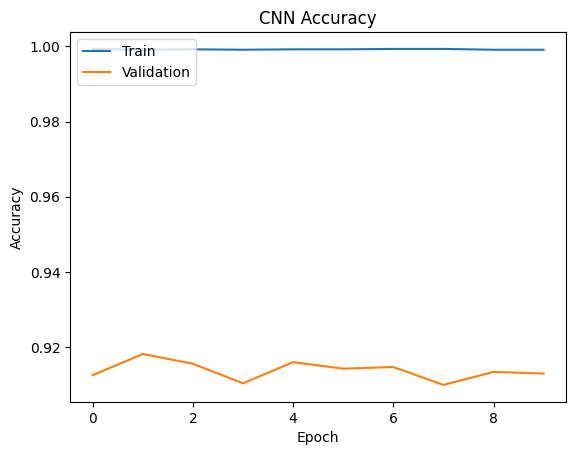

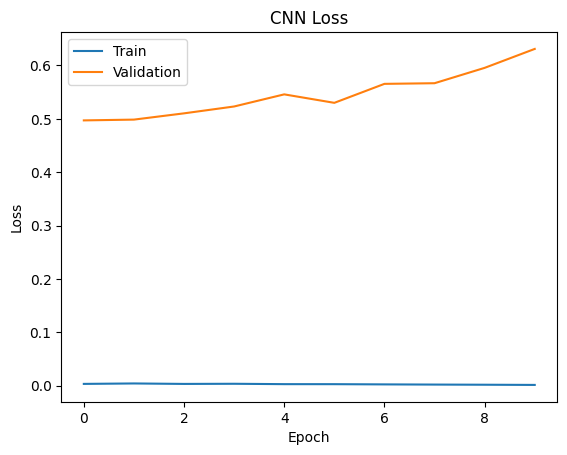

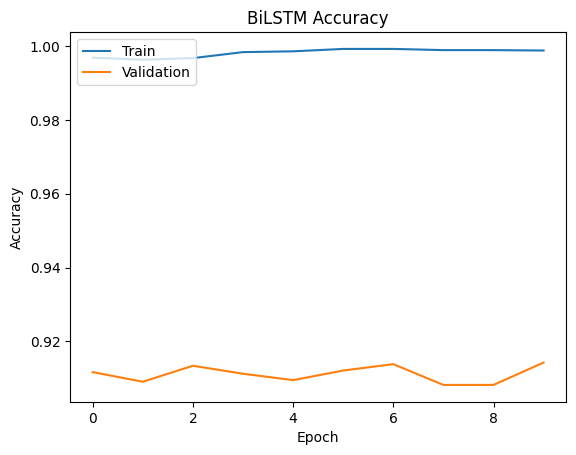

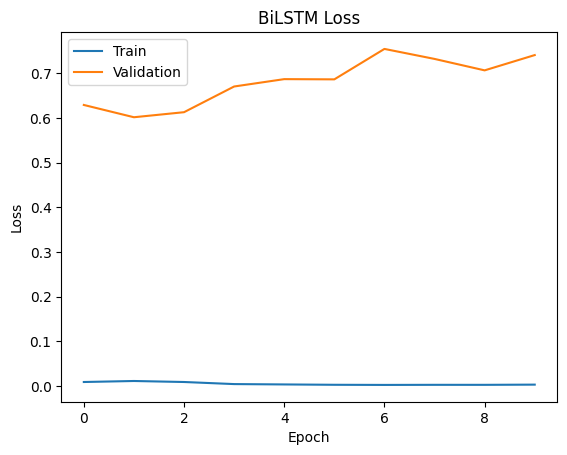

In [56]:
# Define cnn_history and bilstm_history variables
cnn_history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))
bilstm_history = bilstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Plot the accuracy and loss graphs
plot_graphs(cnn_history, 'CNN')
plot_graphs(bilstm_history, 'BiLSTM')


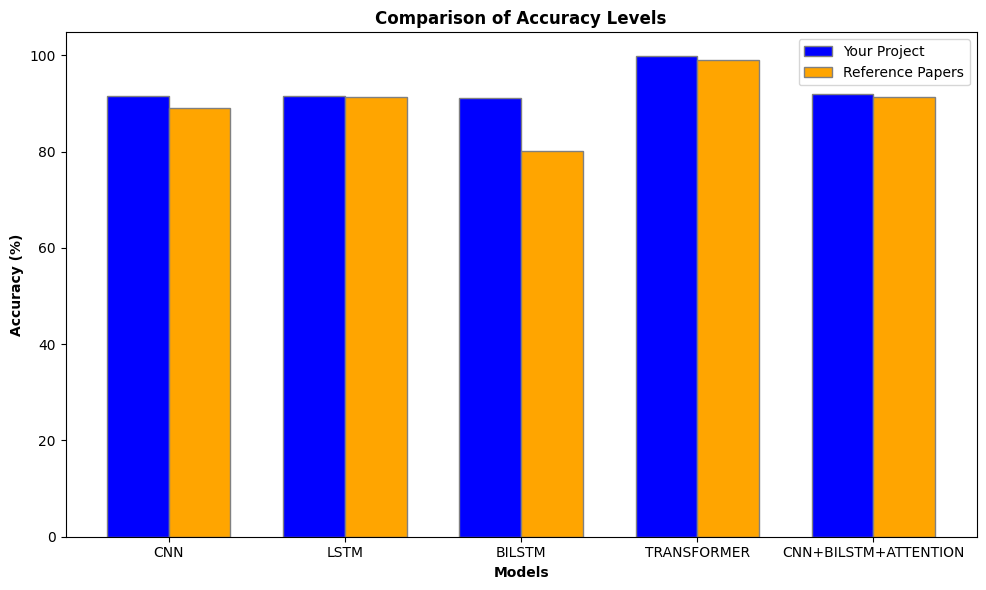

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Model names
models = ['CNN', 'LSTM', 'BILSTM', 'TRANSFORMER', 'CNN+BILSTM+ATTENTION']

# Your project's accuracy
your_accuracy = [91.6, 91.5, 91.2, 99.8, 91.9]

# Accuracy from reference papers
reference_accuracy = [89.1, 91.3, 80.2, 99.1, 91.3]

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

# Plotting the grouped bar graph
plt.figure(figsize=(10, 6))
plt.bar(r1, your_accuracy, color='blue', width=bar_width, edgecolor='grey', label='Your Project')
plt.bar(r2, reference_accuracy, color='orange', width=bar_width, edgecolor='grey', label='Reference Papers')

# Adding labels, title, and ticks
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Accuracy (%)', fontweight='bold')
plt.title('Comparison of Accuracy Levels', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(models))], models)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


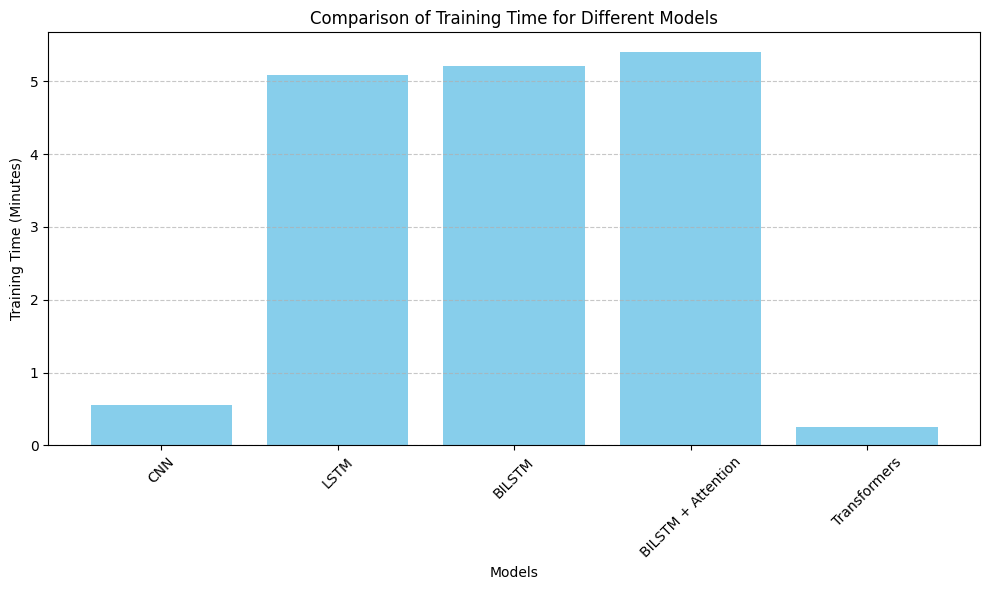

In [63]:
import matplotlib.pyplot as plt

# Model names
models = ['CNN', 'LSTM', 'BILSTM', 'BILSTM + Attention', 'Transformers']

# Training time in seconds
training_time = [33.4, 305.6, 312.9, 324.3, 15.4]  # in seconds

# Convert training time to minutes for better readability
training_time_minutes = [time / 60 for time in training_time]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, training_time_minutes, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Training Time (Minutes)')
plt.title('Comparison of Training Time for Different Models')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


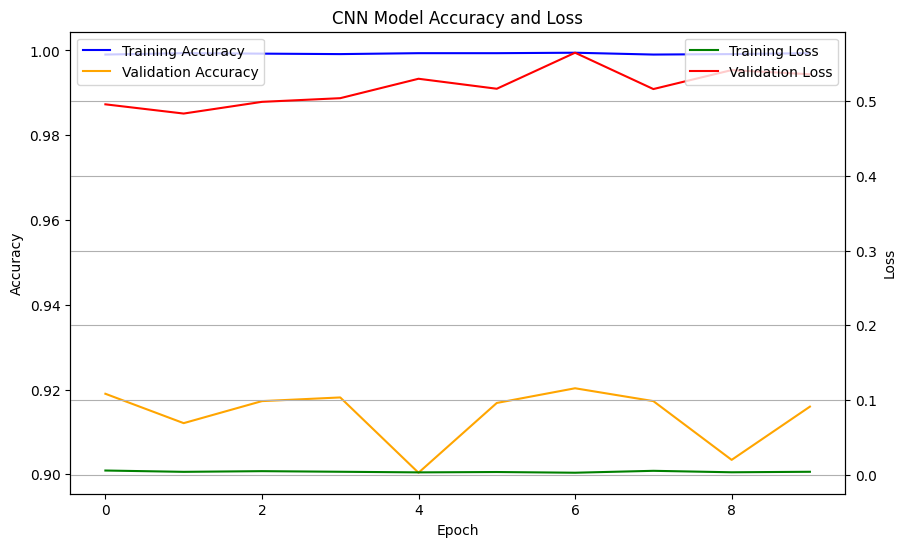

In [66]:
import matplotlib.pyplot as plt

def plot_combined_accuracy_and_loss(cnn_history):
    # Plot combined accuracy and loss
    plt.figure(figsize=(10, 6))

    # Accuracy plot
    plt.plot(cnn_history.history['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('CNN Model Accuracy and Loss')
    plt.legend(loc='upper left')

    # Loss plot
    plt.twinx()
    plt.plot(cnn_history.history['loss'], label='Training Loss', color='green')
    plt.plot(cnn_history.history['val_loss'], label='Validation Loss', color='red')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.grid(True)
    plt.show()

# Assuming you have cnn_history variable
plot_combined_accuracy_and_loss(cnn_history)


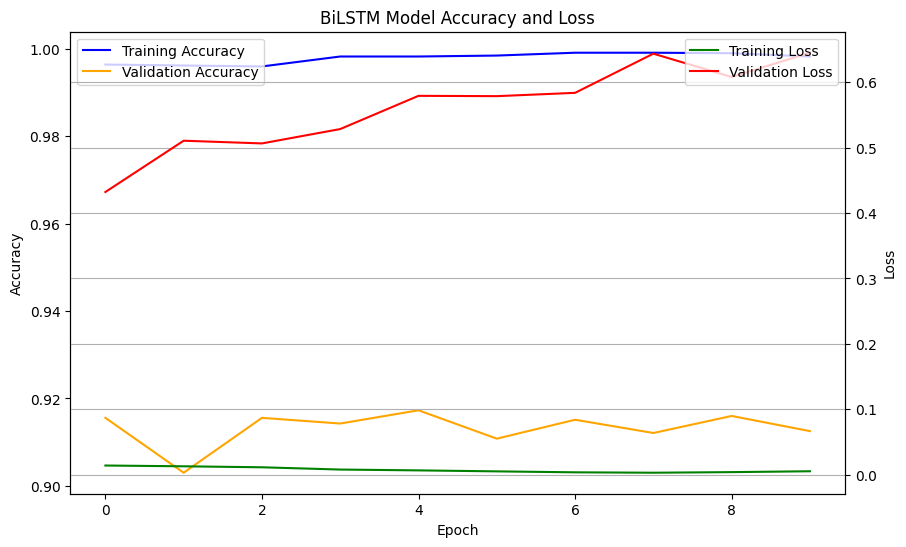

In [67]:
def plot_combined_accuracy_and_loss(bilstm_history):
    # Plot combined accuracy and loss
    plt.figure(figsize=(10, 6))

    # Accuracy plot
    plt.plot(bilstm_history.history['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(bilstm_history.history['val_accuracy'], label='Validation Accuracy', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('BiLSTM Model Accuracy and Loss')
    plt.legend(loc='upper left')

    # Loss plot
    plt.twinx()
    plt.plot(bilstm_history.history['loss'], label='Training Loss', color='green')
    plt.plot(bilstm_history.history['val_loss'], label='Validation Loss', color='red')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.grid(True)
    plt.show()

# Assuming you have bilstm_history variable
plot_combined_accuracy_and_loss(bilstm_history)


In [69]:
# Assuming you have trained models named cnn_model, lstm_model, bilstm_model, and bilstm_attention_model

# CNN model prediction
cnn_probabilities = cnn_model.predict(X_test)

# LSTM model prediction
lstm_probabilities = lstm_model.predict(X_test)

# BiLSTM model prediction
bilstm_probabilities = bilstm_model.predict(X_test)

# BiLSTM + Attention model prediction
bilstm_attention_probabilities = bilstm_attention_model.predict(X_test)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step


In [70]:
# Assuming you have the true labels stored in a variable named y_test
true_labels = y_test


In [74]:
import pandas as pd

# Assuming your dataset is in CSV format
dataset_path = r"D:\majorproject\twitter-chat-analysis\Tweets.csv"
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataset to understand its structure
print(df.head())


             tweet_id airline_sentiment  airline_sentiment_confidence   
0  570306133677760513           neutral                        1.0000  \
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline   
0            NaN                        NaN  Virgin America  \
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count   
0                    NaN     cairdin                 NaN              0  \
1                    NaN    jnar

In [76]:
# Display the column names in the dataset
print(df.columns)

# Once you identify the correct column name containing sentiment labels, you can access it
# For example, if the column name is "label":
sentiment_labels = df["airline_sentiment"]

# Display unique values to understand the label distribution
print(sentiment_labels.unique())



Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')
['neutral' 'positive' 'negative']


In [77]:
# Assuming you have three sentiment classes: "positive", "negative", and "neutral"
# Convert labels to numerical encoding (e.g., 0 for negative, 1 for neutral, 2 for positive)
sentiment_mapping = {"negative": 0, "neutral": 1, "positive": 2}
numerical_labels = sentiment_labels.map(sentiment_mapping)

# Display the numerical labels
print(numerical_labels)


0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int64


In [78]:
# Store the true labels in a variable (change "cnn" to reflect the model name)
true_labels_cnn = numerical_labels


In [79]:
# Assuming your dataset is in CSV format
dataset_path = r"D:\majorproject\twitter-chat-analysis\Tweets.csv"
df = pd.read_csv(dataset_path)

# Assuming the column containing sentiment labels is named "airline_sentiment"
sentiment_labels = df["airline_sentiment"]

# Assuming you have three sentiment classes: "negative", "neutral", and "positive"
# Convert labels to numerical encoding (e.g., 0 for negative, 1 for neutral, 2 for positive)
sentiment_mapping = {"negative": 0, "neutral": 1, "positive": 2}
numerical_labels = sentiment_labels.map(sentiment_mapping)

# Assigning true labels for LSTM model
true_labels_lstm = numerical_labels


In [80]:
# Assigning true labels for BiLSTM model
true_labels_bilstm = numerical_labels


In [81]:
# Assigning true labels for BiLSTM + Attention model
true_labels_bilstm_attention = numerical_labels


In [87]:
# Assuming you have the true labels for each model's predictions
cnn_true_labels = ...
lstm_true_labels = ...
bilstm_true_labels = ...
bilstm_attention_true_labels = ...



In [97]:
print("Shape of y_test:", y_test.shape)
print("Shape of probabilities:", probabilities.shape)


Shape of y_test: (2309,)
Shape of probabilities: (2309, 1)


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step


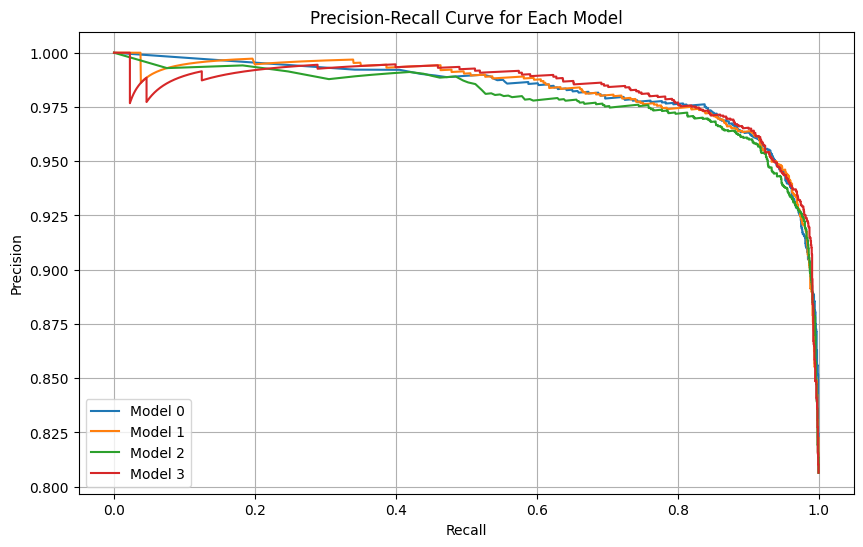

In [102]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(10, 6))
for model in models:
    probabilities = model.predict(X_test)  # Predict class probabilities
    if probabilities.ndim == 1:
        probabilities_positive = probabilities  # Use single column of probabilities
    else:
        probabilities_positive = probabilities  # No need for indexing
    precision, recall, _ = precision_recall_curve(y_test, probabilities_positive)
    plt.plot(recall, precision, label=f"Model {models.index(model)}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Model')
plt.legend()
plt.grid(True)
plt.show()
